# Exploratory Data Analysis for International

***Author: Wahab Ehsan*** 

***Last Updated: 4/1/2020***

***Description: Initial investigations on COVID-19 International data so as to discover patterns, spot anomalies, test hypothesis and check assumptions with the help of summary statistics and graphical representations. (Data from NextStrain and Coronavirus COVID19 API)***

**Importing Libraries**

In [75]:
import os
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
style.use('ggplot')

**Reading Data**

In [76]:
os.chdir(r".\..\..\util\data")

In [77]:
df = pd.read_csv('international.csv')

In [78]:
api_url = 'https://api.covid19api.com/all'
response = requests.get(api_url)
data = ""
if response.status_code == 200:
    data = json.loads(response.content.decode('utf-8'))
else:
    data = "Error"

In [86]:
print(data[1])

{'Country': ' Azerbaijan', 'Province': '', 'Lat': 0, 'Lon': 0, 'Date': '2020-02-28T00:00:00Z', 'Cases': 1, 'Status': 'confirmed'}


In [80]:
df.head()

,strain,virus,gisaid_epi_isl,genbank_accession,date,region,country,division,location,country_exposure,...,length,host,age,sex,originating_lab,submitting_lab,authors,url,title,date_submitted
0,Algeria/G0638_2264/2020,ncov,EPI_ISL_418241,?,2020-03-02,Africa,Algeria,Boufarik,NaN,Algeria,...,29862,Human,28,Female,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
1,Algeria/G0640_2265/2020,ncov,EPI_ISL_418242,?,2020-03-08,Africa,Algeria,Blida,NaN,Algeria,...,29867,Human,87,Male,NIC Viral Respiratory Unit - Institut Pasteur ...,National Reference Center for Viruses of Respi...,Albert et al,https://www.gisaid.org,?,2020-03-29
2,Anhui/SZ005/2020,ncov,EPI_ISL_413485,?,2020-01-24,Asia,China,Anhui,Suzhou,China,...,29860,Human,58,Male,"Department of microbiology laboratory,Anhui Pr...","Department of microbiology laboratory,Anhui Pr...",Li et al,https://www.gisaid.org,?,2020-03-05
3,Australia/NSW01/2020,ncov,EPI_ISL_407893,?,2020-01-24,Oceania,Australia,New South Wales,Sydney,China,...,29782,Human,43,Male,Centre for Infectious Diseases and Microbiolog...,Nova ScotiaW Health Pathology - Institute of C...,Eden et al,https://www.gisaid.org,?,2020-02-06
4,Australia/NSW02/2020,ncov,EPI_ISL_408976,?,2020-01-22,Oceania,Australia,New South Wales,Sydney,Australia,...,29741,Human,53,Male,Centre for Infectious Diseases and Microbiolog...,Nova ScotiaW Health Pathology - Institute of C...,Rockett et al,https://www.gisaid.org,?,2020-02-11


In [81]:
df.shape

(2887, 22)

In [82]:
nextstrain_total = df.groupby('country')['country'].count()
nextstrain_total.to_frame().style.background_gradient(cmap='Pastel1')

,country
country,
Algeria,2
Australia,71
Belgium,98
Brazil,35
Cambodia,1
Canada,129
Chile,7
China,302
Colombia,2


Out of the 2887 cases in this dataset USA has the most with 634 following by UK with 426.

In [83]:
gender_total = df.groupby('sex')['sex'].count().drop(index=['?', 'Unknown', 'unknwon'])
gender_total.to_frame().style.background_gradient(cmap='Pastel1')

,sex
sex,
Female,827
Male,1041


According to the data, there are more cases with males than females.

In [84]:
age_total = df.groupby('age')['age'].count()
age_total = age_total.drop(index=['?'])

age_total.to_frame().style.background_gradient(cmap='Pastel1')

,age
age,
0,5
1,4
10,2
11,5
12,4
13,8
14,6
15,5
16,7


Text(0.5, 0, 'Ages')

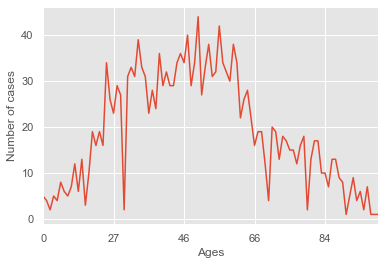

In [85]:
line = age_total.plot.line()
line.set_ylabel('Number of cases')
line.set_xlabel('Ages')

According to the data given the disease doesn't effect only older individuals. There seems to be a normal distribution like curve, where around age 50 has highest cases. 